# Heart Failure Prediction 

#  Domain Analysis: Heart Failure Prediction Dataset

####  Overview
The **Heart Failure Prediction Dataset** contains clinical information about patients that can help identify individuals at risk of heart failure ‚Äî a serious condition where the heart can‚Äôt pump blood effectively. Early prediction of heart failure is essential in preventing severe complications and saving lives.

####  What the Data Represents
Each record in this dataset represents a patient, with key health-related attributes such as:
- **Age** ‚Äì The age of the patient (ranging from 28 to 77 years).
- **Sex** ‚Äì The biological sex of the patient (0 = Female, 1 = Male).
- **ChestPainType** ‚Äì Type of chest pain experienced by the patient:
  - TA: Typical Angina
  - ATA: Atypical Angina
  - NAP: Non-Anginal Pain
  - ASY: Asymptomatic
- **RestingBP** ‚Äì Resting blood pressure (in mm Hg), measured when the patient is not active.
- **Cholesterol** ‚Äì Serum cholesterol level (in mg/dL). A value of 0 may indicate missing data.
- **FastingBS** ‚Äì Whether the patient's fasting blood sugar > 120 mg/dL (1 = Yes, 0 = No).
- **RestingECG** ‚Äì Results from the resting electrocardiogram:
  - Normal
  - ST (having ST-T wave abnormality)
  - LVH (showing probable or definite left ventricular hypertrophy)
- **MaxHR** ‚Äì The maximum heart rate achieved during physical activity.
- **ExerciseAngina** ‚Äì Whether the patient experienced angina during exercise (1 = Yes, 0 = No).
- **Oldpeak** ‚Äì ST depression induced by exercise relative to rest; helps detect ischemia.
- **ST_Slope** ‚Äì Slope of the peak exercise ST segment:
  - Up: Upsloping
  - Flat: Flat
  - Down: Downsloping
- **HeartDisease** ‚Äì Target variable (1 = presence of heart disease, 0 = absence of heart disease).

####  Domain Relevance
This dataset is part of the **cardiology and healthcare analytics** domain. It supports:
- **Clinical decision-making** by providing data-driven insights into patient risk profiles.
- **Preventive care** through early identification of high-risk patients.
- **Predictive modeling** to assist doctors in prioritizing care and planning interventions.

####  Key Use Cases
- **Predictive Modeling:** Train ML models to predict heart failure risk.
- **Patient Stratification:** Segment patients based on their risk levels.
- **Health Policy Planning:** Support screening programs or lifestyle intervention campaigns.

####  Real-World Impact
- Enables **early warnings** before the onset of symptoms.
- Helps clinicians **allocate resources** to high-risk patients more effectively.
- Encourages **personalized healthcare** through targeted recommendations.

---

**In summary**, the Heart Failure Prediction Dataset offers valuable insight into patient heart health, empowering the healthcare system to take **proactive, data-driven steps toward reducing the impact of cardiovascular diseases**.


# Importing Data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

# Prechecks

In [5]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [6]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

###  Key Insights from Numerical Features

- **Age**
  - Most people in the dataset are between 28 and 77 years old, with an average age of around 53. This suggests the data mostly represents middle-aged and older adults.

- **Resting Blood Pressure**
  - The average resting blood pressure is about 132 mm Hg, which is a bit above the normal range.
  - Some records show a value of 0, which isn‚Äôt realistic ‚Äî this probably means missing or incorrect data.

- **Cholesterol**
  - Cholesterol levels vary widely, with an average around 199 mg/dL.
  - Some entries have a value of 0, which likely indicates missing information.
  - The large variation suggests there are some extreme values or outliers.

- **Fasting Blood Sugar**
  - About 23% of the people have high fasting blood sugar (above 120 mg/dL), which could mean they‚Äôre at risk for diabetes.

- **Maximum Heart Rate**
  - Heart rates go from 60 to 202 bpm, with an average around 137. This looks normal and doesn‚Äôt raise immediate concerns.

- **Oldpeak (ST Depression)**
  - This measures changes in the ECG during exercise. Some values are negative, which might not be valid and should be looked into.

- **Heart Disease**
  - Around 55% of the people in the dataset have heart disease, so there's a slight imbalance in the data toward positive cases.


In [9]:
df.describe(include='O')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

###  Key Insights from Categorical Features

- **Sex:** Majority are male.
- **ChestPainType:** Most have asymptomatic chest pain, which is concerning.
- **RestingECG:** Normal ECG is most common, but abnormalities are present.
- **ExerciseAngina:** Most people did not experience angina during exercise.
- **ST_Slope:** Flat slope is most frequent, often linked to heart issues.


In [10]:
print("\n Unique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
   print(f"{col}: {df[col].unique()}")


 Unique values in categorical columns:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


# EDA

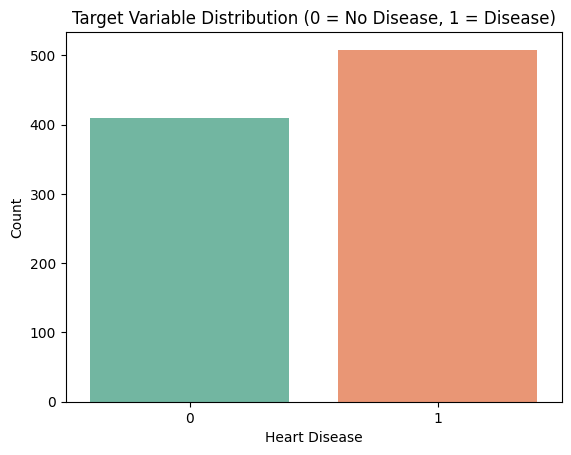

In [11]:
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title("Target Variable Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


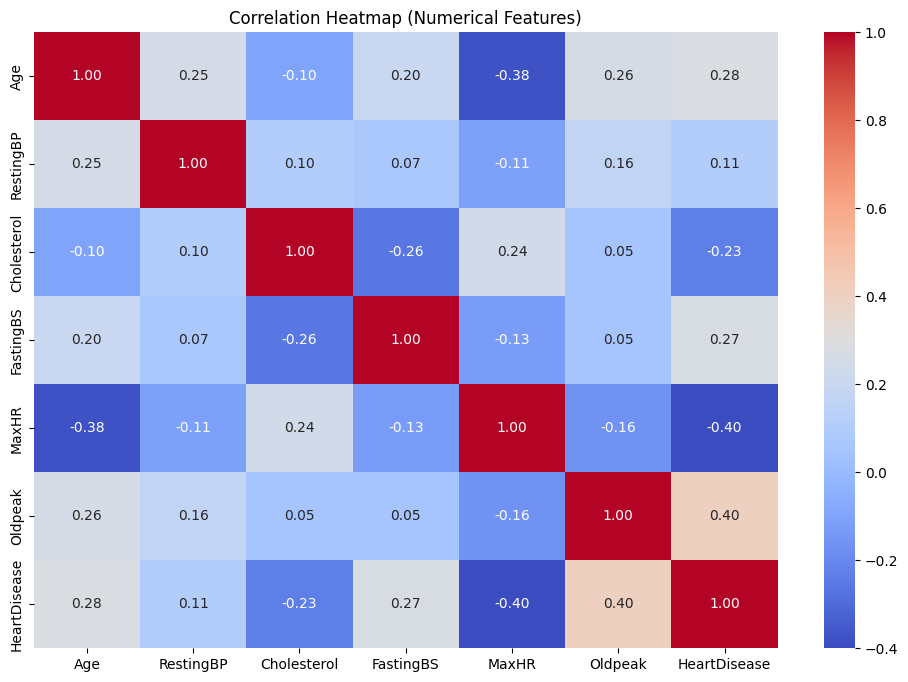

In [12]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


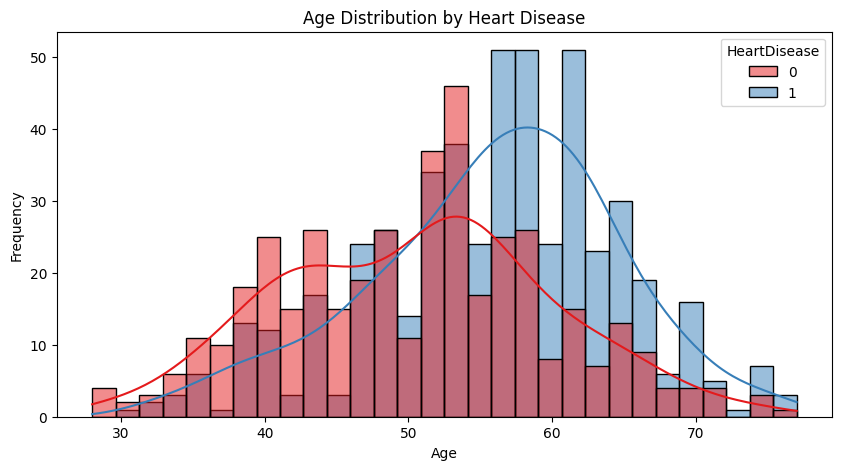

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, palette='Set1', bins=30)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


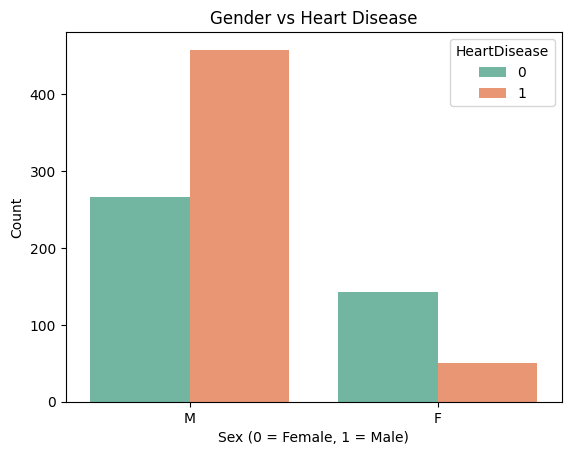

In [14]:
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='Set2')
plt.title("Gender vs Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


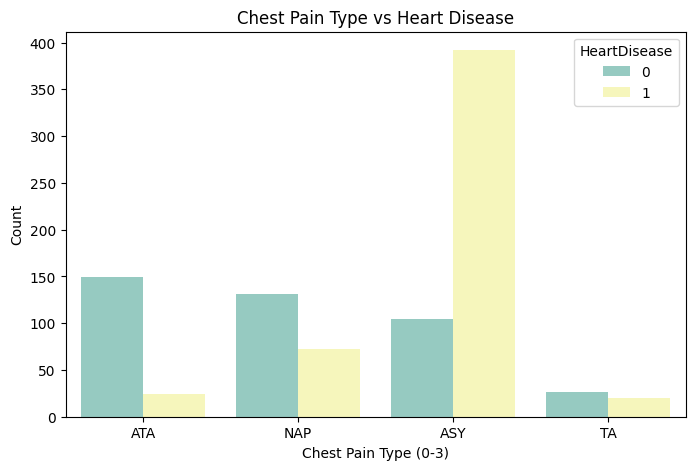

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set3')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.show()


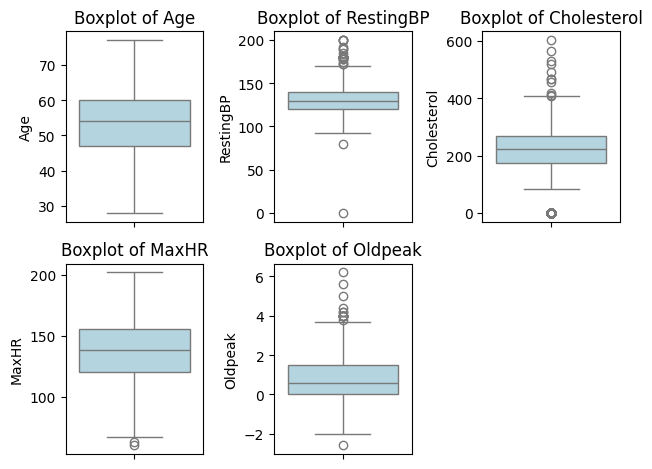

In [10]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Boxplot
plt.Figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col],color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

###  Key Insights from Boxplots

- **RestingBP** & **Cholesterol**: Both columns contain zero values, which are physiologically impossible. These represent critical data errors that must be imputed or removed before modeling.


# DATA PREPROCESSING

### Handling Invalid Values

In [11]:
# replacing '0' with nan
df['RestingBP']=df['RestingBP'].replace(0,np.nan)
df['Cholesterol']=df['Cholesterol'].replace(0,np.nan)
df['Oldpeak']=df['Oldpeak'].apply(lambda x: np.nan if x < 0 else x) # replacing negative values with nan 

# median imputation
df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)
df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace=True)
# 

### Outlier Handling

In [15]:
def cap_ouliers(df,column,lower_percentile=0.01,upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [ ]:
# Apply capping (Winsorization) for RestingBP, Cholesterol and MaxHR
for col in ['RestingBP', 'Cholesterol', 'MaxHR']:
    df= cap_ouliers(df,col)

In [17]:
# Apply log(1 + x) transformation for the skewed feature Oldpeak
df['Oldpeak'] = np.log1p(df['Oldpeak'])

In [18]:
df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].describe()

RestingBP  Cholesterol       MaxHR     Oldpeak
count  918.000000   918.000000  918.000000  918.000000
mean   132.434314   242.500327  136.837364    0.513648
std     17.531163    48.978759   25.122101    0.506831
min     95.170000   129.340000   77.170000    0.000000
25%    120.000000   214.000000  120.000000    0.000000
50%    130.000000   237.000000  138.000000    0.470004
75%    140.000000   267.000000  156.000000    0.916291
max    180.000000   411.490000  186.000000    1.974081

### Encoding

In [ ]:
# label encoding for Sex and ExerciseAngina
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])



In [26]:
# Ordinal Encoding for ST_Slope
slope_order = {'Up': 0, 'Flat': 1, 'Down': 2}
df['ST_Slope'] = df['ST_Slope'].map(slope_order)

In [27]:
# One-Hot Encoding for ChestPainType and RestingECG
df = pd.get_dummies(df,columns=['ChestPainType', 'RestingECG'],drop_first=True)

In [29]:
# Convert all boolean columns (from one-hot encoding) to integers
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

In [30]:
df.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1      140.0        289.0          0  172.0               0   
1   49    0      160.0        180.0          0  156.0               0   
2   37    1      130.0        283.0          0   98.0               0   
3   48    0      138.0        214.0          0  108.0               1   
4   54    1      150.0        195.0          0  122.0               0   

    Oldpeak  ST_Slope  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0  0.000000         0             0                  1                  0   
1  0.693147         1             1                  0                  1   
2  0.000000         0             0                  1                  0   
3  0.916291         1             1                  0                  0   
4  0.000000         0             0                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  
0                 0                  1              0  
1                 0                  1              0  
2                 0                  0              1  
3                 0                  1              0  
4                 0                  1              0

### Splitting the Data

In [ ]:
# Splitting input & output
X = df.drop(columns='HeartDisease', axis=1)
Y = df['HeartDisease']


In [37]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42, stratify= Y  )

### Scaling

In [38]:
num_cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])
X_test[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

# MODELLING

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score    

In [42]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [44]:
model_results={}
# training and evaluating each model
for name, model in models.items():
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test,y_pred)
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))

    model_results[name] = {
        'model': model,
        'accuracy': acc,
        'y_pred': y_pred
    }



LogisticRegression
Accuracy: 0.8695652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        82
           1       0.86      0.91      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


Random Forest
Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184


K-Nearest Neighbors
Accuracy: 0.8260869565217391
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        82
           1       0.84      0.85     

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

comparison_results = []

for name, result in model_results.items():
    y_pred = result['y_pred']
    
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    
    comparison_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(comparison_results)

# Sort by Recall (highest first), then F1-Score
metrics_df = metrics_df.sort_values(by=['Recall', 'F1-Score'], ascending=[False, False]).reset_index(drop=True)

print(metrics_df)


                    Model  Accuracy  Precision    Recall  F1-Score
0      LogisticRegression  0.869565   0.861111  0.911765  0.885714
1           Random Forest  0.875000   0.891089  0.882353  0.886700
2       Gradient Boosting  0.875000   0.891089  0.882353  0.886700
3             Naive Bayes  0.853261   0.864078  0.872549  0.868293
4  Support Vector Machine  0.842391   0.847619  0.872549  0.859903
5                 XGBoost  0.864130   0.888889  0.862745  0.875622
6     K-Nearest Neighbors  0.826087   0.836538  0.852941  0.844660
7           Decision Tree  0.766304   0.780952  0.803922  0.792271


## Best Performing Model: **Logistic Regression**

### Why Logistic Regression is the Best:
- Among all models, **Logistic Regression achieved the highest Recall score of 0.91**.
- This means it correctly identified **91% of actual heart disease cases**, making it the most reliable model for **minimizing false negatives**.

### Evaluation Metrics Considered:
- **Recall**: Measures how many actual positive cases (heart disease patients) were correctly identified.
  - In a **healthcare scenario**, missing a true positive (i.e., someone with heart disease) can be life-threatening. Hence, **Recall is the top priority**.
- **F1-Score**: The harmonic mean of Precision and Recall.
  - A high F1-score (0.88) confirms that the model maintains a **good balance** between Recall and Precision.
- **Accuracy & Precision**: While these are useful, they are **secondary in this context**.
  - Accuracy can be misleading with class imbalance.
  - Precision is important but not as critical as Recall when false negatives are more dangerous.

### Summary:
Logistic Regression is selected as the best model because:
- It has **the highest Recall**, ensuring fewer missed heart disease cases.
- It maintains **balanced performance across other metrics** (Precision: 0.86, F1: 0.88).
- It is also **interpretable**, which is crucial in healthcare for transparency and trust.


In [50]:
best_model = model_results['LogisticRegression']['model']


In [51]:

# üë§ Random new patient's raw input (already encoded format assumed)
sample_data = pd.DataFrame({
    'Age': [58],
    'Sex': [1],
    'RestingBP': [140.0],
    'Cholesterol': [240.0],
    'FastingBS': [0],
    'MaxHR': [150.0],
    'ExerciseAngina': [1],
    'Oldpeak': [1.5],
    'ST_Slope': [2],
    'ChestPainType_ATA': [1],
    'ChestPainType_NAP': [0],
    'ChestPainType_TA': [0],
    'RestingECG_Normal': [1],
    'RestingECG_ST': [0]
})

# üî¢ Scale the same numerical columns as used during training
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
sample_data[num_cols] = scaler.transform(sample_data[num_cols])  # use the same scaler from before

# üß† Predict using best model (Random Forest)
pred = best_model.predict(sample_data)

# ü©∫ Output result
print("Input Features:\n", sample_data)
print("\nPrediction:", "‚ö†Ô∏è Likely Heart Disease" if pred[0]==1 else "‚úÖ Unlikely Heart Disease")


Input Features:
         Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0  0.440022    1   0.411624      -0.0832          0  0.532157               1   

    Oldpeak  ST_Slope  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0  1.971852         2                  1                  0                 0   

   RestingECG_Normal  RestingECG_ST  
0                  1              0  

Prediction: ‚ö†Ô∏è Likely Heart Disease
